In [78]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt


In [79]:
dataset=pd.read_csv('dt2.csv')


In [80]:
dataset.head()

,Date,month,year,power_MW
0,31,12,2004,13478
1,31,12,2004,12865
2,31,12,2004,12577
3,31,12,2004,12517
4,31,12,2004,12670


In [85]:
dataset.month.unique()

array([12, 11, 10])

In [81]:
dataset.describe()

,Date,month,year,power_MW
count,1796.000000,1796.000000,1796.000000,1796.000000
mean,21.889755,11.254454,2004.253341,15857.445991
std,5.404536,0.834064,0.435046,2376.302705
min,13.000000,10.000000,2004.000000,10263.000000
25%,17.000000,10.000000,2004.000000,14136.250000
50%,22.000000,12.000000,2004.000000,15658.000000
75%,27.000000,12.000000,2005.000000,17360.000000
max,31.000000,12.000000,2005.000000,22577.000000


<Axes: >

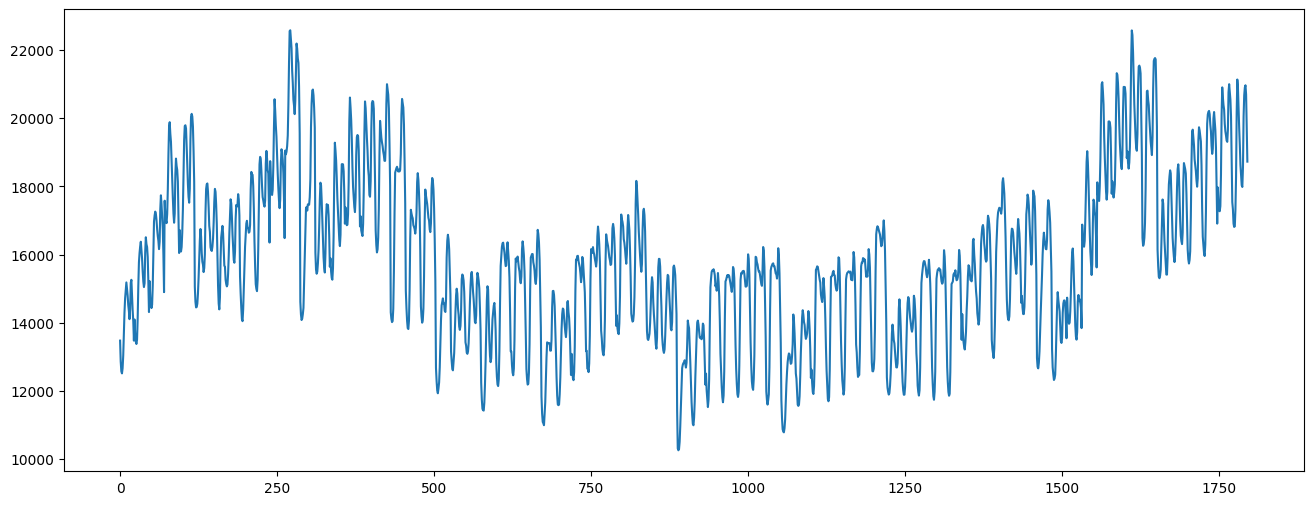

In [82]:
dataset['power_MW'].plot(figsize=(16,6))

In [30]:
x=dataset[['Date','month','year']]
y=dataset['power_MW']


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [32]:
X_train.shape

(1347, 3)

In [33]:
X_test.shape

(449, 3)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor=LinearRegression()

In [35]:
regressor.fit(X_train,y_train)

LinearRegression()

In [36]:
print(regressor.coef_)

[-112.68438859 1622.52051961  294.83197449]


In [37]:
print(regressor.intercept_)

-590824.7687085668


In [38]:
predicted=regressor.predict(X_test)

In [39]:
print(X_test)

      Date  month  year
1081    23     10  2004
1706    16     12  2005
927     30     10  2004
713     20     11  2004
262     22     12  2004
...    ...    ...   ...
1366    30     12  2005
1522    24     12  2005
1044    25     10  2004
1461    26     12  2005
1722    16     12  2005

[449 rows x 3 columns]


In [40]:
predicted.shape

(449,)

In [41]:
print(y_test)

1081    11600
1706    18662
927     13684
713     14640
262     16484
        ...  
1366    14116
1522    13599
1044    15446
1461    12708
1722    18624
Name: power_MW, Length: 449, dtype: int64


In [42]:
print(predicted)

[13651.97242267 17980.63615652 12863.18170252 15612.54610806
 17009.69785048 16784.3290733  17347.75101626 12750.49731393
 12975.86609112 14440.76314281 15950.59927383 16515.73910483
 14328.07875422 15995.53835316 17009.69785048 16671.64468471
 13990.02558844 14485.70222214 13539.28803408 15725.23049665
 14711.07099932 18023.85734781 13313.91925689 17304.52982497
 13877.34119985 14778.81630859 17755.26737934 12975.86609112
 14328.07875422 13088.55047971 14102.70997704 17980.63615652
 16853.7922706  15995.53835316 16290.37032764 13201.2348683
 17573.11979344 15837.91488524 17235.06662767 16446.27590752
 16290.37032764 16628.42349342 16403.05471624 17573.11979344
 17079.16104779 14598.38661073 18093.32054512 17798.48857063
 14553.4475314  14598.38661073 17911.17295922 16853.7922706
 13201.2348683  14485.70222214 13088.55047971 14711.07099932
 14485.70222214 17079.16104779 17460.43540485 16784.3290733
 14598.38661073 14936.4397765  15161.80855369 16558.96029612
 14711.07099932 17079.16104

In [43]:
print(len(predicted))

449


In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [45]:
regressor.score(X_test,y_test)

0.435927934069515

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
r2 = r2_score(y_test, predicted)
print("R-squared:", r2)

R-squared: 0.435927934069515


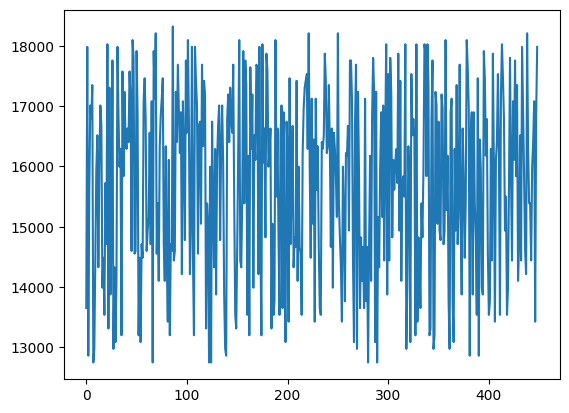

In [47]:
plt.plot(predicted)

<Axes: title={'center': 'Actual Energy Consumed'}>

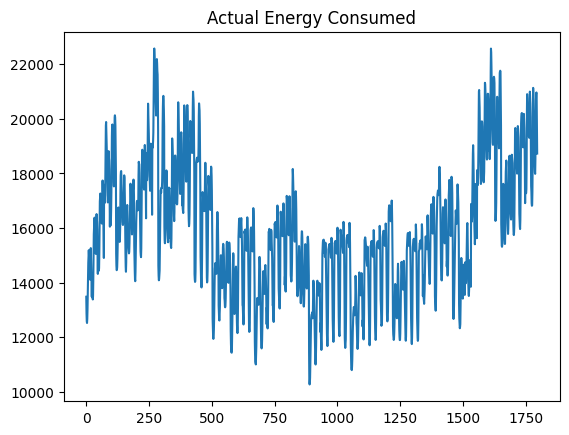

In [48]:
dataset['power_MW'].plot(title="Actual Energy Consumed")

In [49]:
df=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [50]:
df.head(25)

,Actual,Predicted
1081,11600,13651.972423
1706,18662,17980.636157
927,13684,12863.181703
713,14640,15612.546108
262,16484,17009.697850
182,15762,16784.329073
303,18211,17347.751016
895,12671,12750.497314
933,12510,12975.866091
1266,14375,14440.763143


In [51]:
graph=df.head(20)

<Axes: >

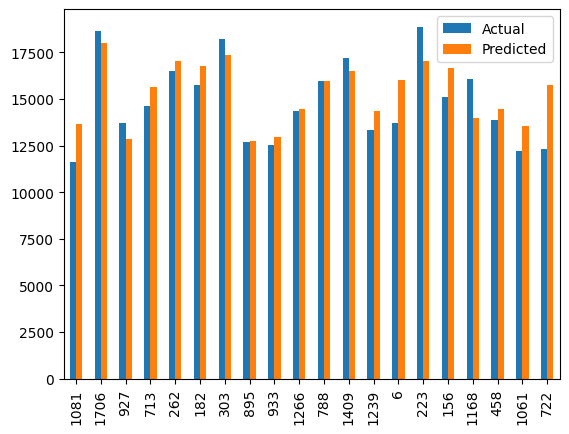

In [52]:
graph.plot(kind='bar')

In [53]:
input_data = [12,4,2023]
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
y_pred = regressor.predict(input_data_reshaped)
print(y_pred)

[10758.18509477]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
